In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Predict Nationality from Names
- In this exercise, we are going to get names of the European Parliment members from European Parliment website.
- We will use `xml.etree.ElementTree` library for turning an xml file in string format into xml file
- We will use `requests` library to request an`xml` file from a webpage

  - XML documents have sections, called elements, defined by a beginning and an ending tag. A tag is a markup construct that begins with < and ends with >. The characters between the start-tag and end-tag, if there are any, are the element's content. Elements can contain markup, including other elements, which are called "child elements".
  - The largest, top-level element is called the root, which contains all other elements.
  - Attributes are name–value pair that exist within a start-tag or empty-element tag. An XML attribute can only have a single value and each attribute can appear at most once on each element.
  

In [2]:
import xml.etree.ElementTree as ET

In [3]:
import requests

In [4]:
response = requests.get("https://www.europarl.europa.eu/meps/en/full-list/xml")

In [5]:
print(response.status_code)

print(response.headers['content-type'])

print(response.encoding)

print(response.text[:100])

200
application/xml;charset=UTF-8
UTF-8
<?xml version="1.0" encoding="UTF-8" standalone="yes"?><meps><mep><fullName>Magdalena ADAMOWICZ</ful


response.text

- `fromstring()` parses XML from a string directly into an `Element`, which is the root element of the parsed tree.

In [6]:
data_xml = ET.fromstring(response.text)

In [7]:
data_xml.tag

'meps'

In [8]:
data_xml.attrib

{}

In [9]:
type(data_xml)

xml.etree.ElementTree.Element

In [10]:
len(data_xml)

702

In [12]:
root=data_xml
[elem.tag for elem in root.iter()];

In [13]:
#meps: members of european parliament
i=0
for child in data_xml.iter():
    print(child.tag, child.attrib)
    i=i+1
    if i==20:
        break

meps {}
mep {}
fullName {}
country {}
politicalGroup {}
id {}
nationalPoliticalGroup {}
mep {}
fullName {}
country {}
politicalGroup {}
id {}
nationalPoliticalGroup {}
mep {}
fullName {}
country {}
politicalGroup {}
id {}
nationalPoliticalGroup {}
mep {}


In [14]:
i=0
for child in data_xml.iter('fullName'):
    print(child.tag, child.text)
    i=i+1
    if i==20:
        break

fullName Magdalena ADAMOWICZ
fullName Asim ADEMOV
fullName Isabella ADINOLFI
fullName Matteo ADINOLFI
fullName Alex AGIUS SALIBA
fullName Mazaly AGUILAR
fullName Clara AGUILERA
fullName Alviina ALAMETSÄ
fullName Alexander ALEXANDROV YORDANOV
fullName François ALFONSI
fullName Atidzhe ALIEVA-VELI
fullName Abir AL-SAHLANI
fullName Álvaro AMARO
fullName Andris AMERIKS
fullName Christine ANDERSON
fullName Rasmus ANDRESEN
fullName Barry ANDREWS
fullName Eric ANDRIEU
fullName Mathilde ANDROUËT
fullName Nikos ANDROULAKIS


In [15]:
data_xml[0][0].text

'Magdalena ADAMOWICZ'

In [16]:
data_xml[0][1].text

'Poland'

In [17]:
#members_xml = data_xml.getchildren()

- We are now turning the xml string file into a list

In [18]:
members_xml = list(data_xml)

In [19]:
members_xml[1][0].text

'Asim ADEMOV'

In [20]:
import pandas as pd
members_dict = [{i.tag: i.text for i in member} for member in members_xml]
members = pd.DataFrame(members_dict)

In [21]:
members_dict[:5]

[{'fullName': 'Magdalena ADAMOWICZ',
  'country': 'Poland',
  'politicalGroup': "Group of the European People's Party (Christian Democrats)",
  'id': '197490',
  'nationalPoliticalGroup': 'Independent'},
 {'fullName': 'Asim ADEMOV',
  'country': 'Bulgaria',
  'politicalGroup': "Group of the European People's Party (Christian Democrats)",
  'id': '189525',
  'nationalPoliticalGroup': 'Citizens for European Development of Bulgaria'},
 {'fullName': 'Isabella ADINOLFI',
  'country': 'Italy',
  'politicalGroup': "Group of the European People's Party (Christian Democrats)",
  'id': '124831',
  'nationalPoliticalGroup': 'Forza Italia'},
 {'fullName': 'Matteo ADINOLFI',
  'country': 'Italy',
  'politicalGroup': 'Identity and Democracy Group',
  'id': '197826',
  'nationalPoliticalGroup': 'Lega'},
 {'fullName': 'Alex AGIUS SALIBA',
  'country': 'Malta',
  'politicalGroup': 'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament',
  'id': '197403',
  'nationalPo

In [22]:
members[:20]

,fullName,country,politicalGroup,id,nationalPoliticalGroup
0,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,197490,Independent
1,Asim ADEMOV,Bulgaria,Group of the European People's Party (Christia...,189525,Citizens for European Development of Bulgaria
2,Isabella ADINOLFI,Italy,Group of the European People's Party (Christia...,124831,Forza Italia
3,Matteo ADINOLFI,Italy,Identity and Democracy Group,197826,Lega
4,Alex AGIUS SALIBA,Malta,Group of the Progressive Alliance of Socialist...,197403,Partit Laburista
5,Mazaly AGUILAR,Spain,European Conservatives and Reformists Group,198096,VOX
6,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,125045,Partido Socialista Obrero Español
7,Alviina ALAMETSÄ,Finland,Group of the Greens/European Free Alliance,204335,Vihreä liitto
8,Alexander ALEXANDROV YORDANOV,Bulgaria,Group of the European People's Party (Christia...,197836,Union of Democratic Forces
9,François ALFONSI,France,Group of the Greens/European Free Alliance,96750,Régions et Peuples Solidaires


# Predicting nationalities from names

In [23]:
members.shape

(702, 5)

- Create a bar graph showing the ratio of nationalities in the European parliament

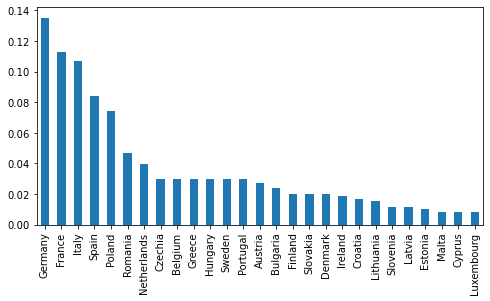

In [24]:
y_mem = members.country
data_mem = members.fullName
plt.figure(figsize=(8, 4))
(y_mem.value_counts() / y_mem.size).plot(kind='bar');

- print the value counts of the members per country

In [25]:
tt=y_mem.value_counts()[:8]

In [26]:
tt.values, tt.index

(array([95, 79, 75, 59, 52, 33, 28, 21]),
 Index(['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania',
        'Netherlands', 'Czechia'],
       dtype='object'))

- Get the names of the first 8 countries with the largest number of meps

In [27]:
large = y_mem.value_counts()[:8].index
large

Index(['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania',
       'Netherlands', 'Czechia'],
      dtype='object')

- create a data with the parliament members in the first eight countries
- split data into test and train datasets

In [28]:
mask = y_mem.isin(large)
data_mem = data_mem[mask]
y_mem = y_mem[mask]

In [29]:
mask

0       True
1      False
2       True
3       True
4      False
       ...  
697     True
698    False
699    False
700     True
701    False
Name: country, Length: 702, dtype: bool

In [30]:
(y_mem.value_counts() / y_mem.size)

Germany        0.214932
France         0.178733
Italy          0.169683
Spain          0.133484
Poland         0.117647
Romania        0.074661
Netherlands    0.063348
Czechia        0.047511
Name: country, dtype: float64

In [31]:
data_mem.shape

(442,)

In [32]:
text_mem_train, text_mem_test, y_mem_train, y_mem_test = \
train_test_split(data_mem, y_mem,  stratify=y_mem, random_state=0)

- create a pipeline of `countvectorizer` and `logisticregressioncv`
- report the cross validation scores

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
bow_pipe = make_pipeline(CountVectorizer(), LogisticRegressionCV())
cross_val_score(bow_pipe, text_mem_train, y_mem_train, cv=5,\
                scoring='f1_macro')

array([0.346, 0.293, 0.302, 0.276, 0.345])

- Repeat the same procedure, with vectorizer having the parameter of analyzer="char_wb"

 - analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’ Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

In [34]:
char_pipe = make_pipeline(CountVectorizer(analyzer="char_wb",\
ngram_range=(1, 4)), LogisticRegressionCV(solver='liblinear'))
cross_val_score(char_pipe, text_mem_train, y_mem_train, cv=5, scoring='f1_macro')

array([0.649, 0.473, 0.48 , 0.448, 0.497])

In [35]:
char_pipe.fit(text_mem_train, y_mem_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer='char_wb', ngram_range=(1, 4))),
                ('logisticregressioncv',
                 LogisticRegressionCV(solver='liblinear'))])

- print the top 20 most important and least important n-grams

In [36]:
def plot_important_features(coef, feature_names, top_n=20,\
                            ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important],\
                       rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

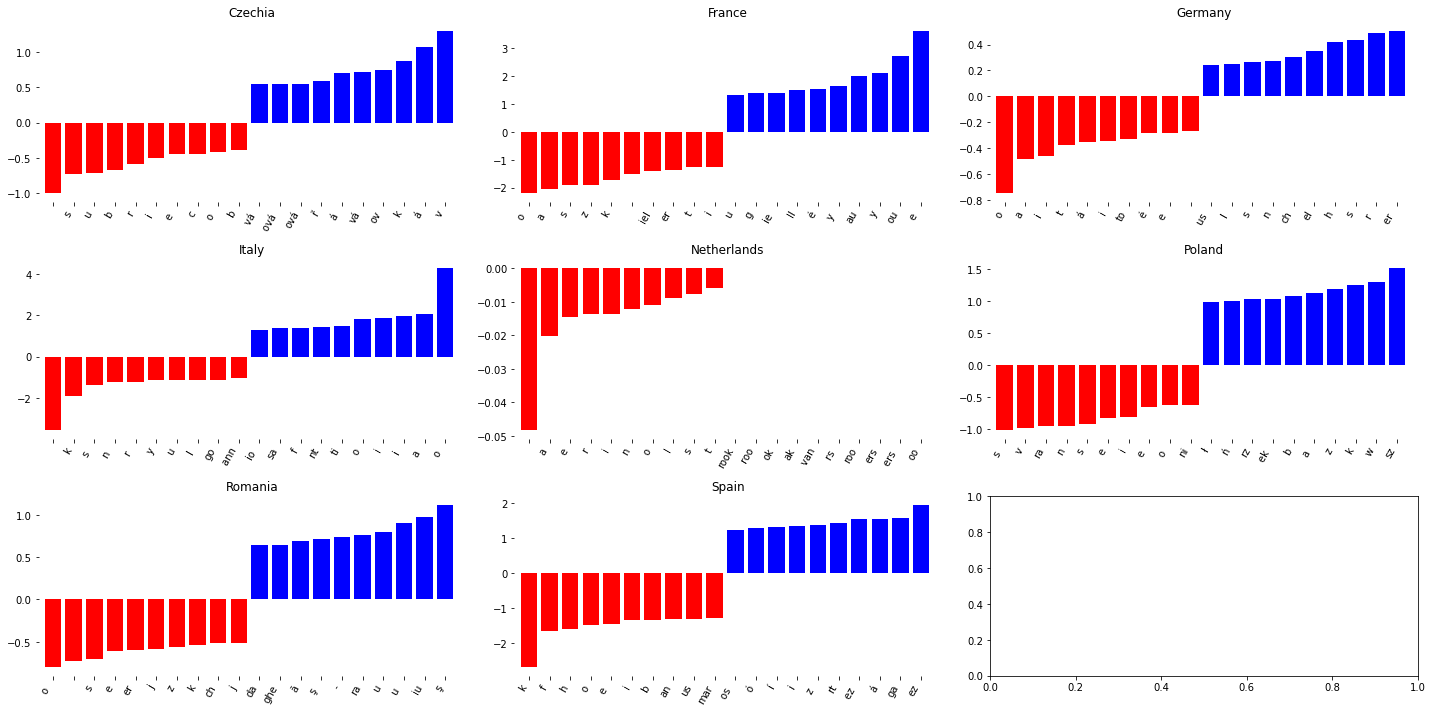

In [37]:
lr = char_pipe.named_steps['logisticregressioncv']
feature_names = np.array(char_pipe.named_steps\
                         ['countvectorizer'].get_feature_names_out())
n_classes = len(lr.classes_)
fig, axes = plt.subplots(n_classes // 3 + 1, 3, figsize=(20, 10))
for ax, coef, label in zip(axes.ravel(), lr.coef_, lr.classes_):
    ax.set_title(label)
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

- Now make a gridsearch over logistic regression, countvectorizer n-grams, min_df and normalizer

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.001],
              "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 5), (1, 7),
                                               (2, 3), (2, 5), (3, 8), (5, 5)],
              "countvectorizer__min_df": [1, 2, 3],
              "normalizer": [None, Normalizer()]
             }
grid = GridSearchCV(make_pipeline(CountVectorizer(analyzer="char"),\
Normalizer(), LogisticRegression(solver='liblinear')),\
param_grid=param_grid, cv=10, \
scoring="f1_macro",return_train_score=True
                   )


In [39]:
grid.fit(text_mem_train, y_mem_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(analyzer='char')),
                                       ('normalizer', Normalizer()),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'countvectorizer__min_df': [1, 2, 3],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 5), (1, 7),
                                                          (2, 3), (2, 5),
                                                          (3, 8), (5, 5)],
                         'logisticregression__C': [100, 10, 1, 0.1, 0.001],
                         'normalizer': [None, Normalizer()]},
             return_train_score=True, scoring='f1_macro')

In [40]:
grid.best_score_

0.6098917747843832

In [41]:
grid.best_params_

{'countvectorizer__min_df': 2,
 'countvectorizer__ngram_range': (1, 5),
 'logisticregression__C': 100,
 'normalizer': Normalizer()}

In [42]:
results = pd.DataFrame(grid.cv_results_)
res_pivot = results.pivot_table(values=['mean_test_score', 'mean_train_score'],
                                index=["param_countvectorizer__ngram_range", "param_logisticregression__C",
                                       "param_countvectorizer__min_df"])

In [144]:
res_pivot.mean_test_score

param_countvectorizer__ngram_range  param_logisticregression__C  param_countvectorizer__min_df
(1, 1)                              0.001                        1                                0.090173
                                                                 2                                0.090173
                                                                 3                                0.090173
                                    0.100                        1                                0.283645
                                                                 2                                0.283645
                                                                                                    ...   
(5, 5)                              10.000                       2                                0.266265
                                                                 3                                0.191529
                                    100.000      

In [145]:
bla = res_pivot.mean_test_score.unstack(["param_countvectorizer__ngram_range"])
bla = bla.swaplevel().sort_index()
bla.index.names = ['min_df', 'C']
bla.style.background_gradient(cmap="viridis")

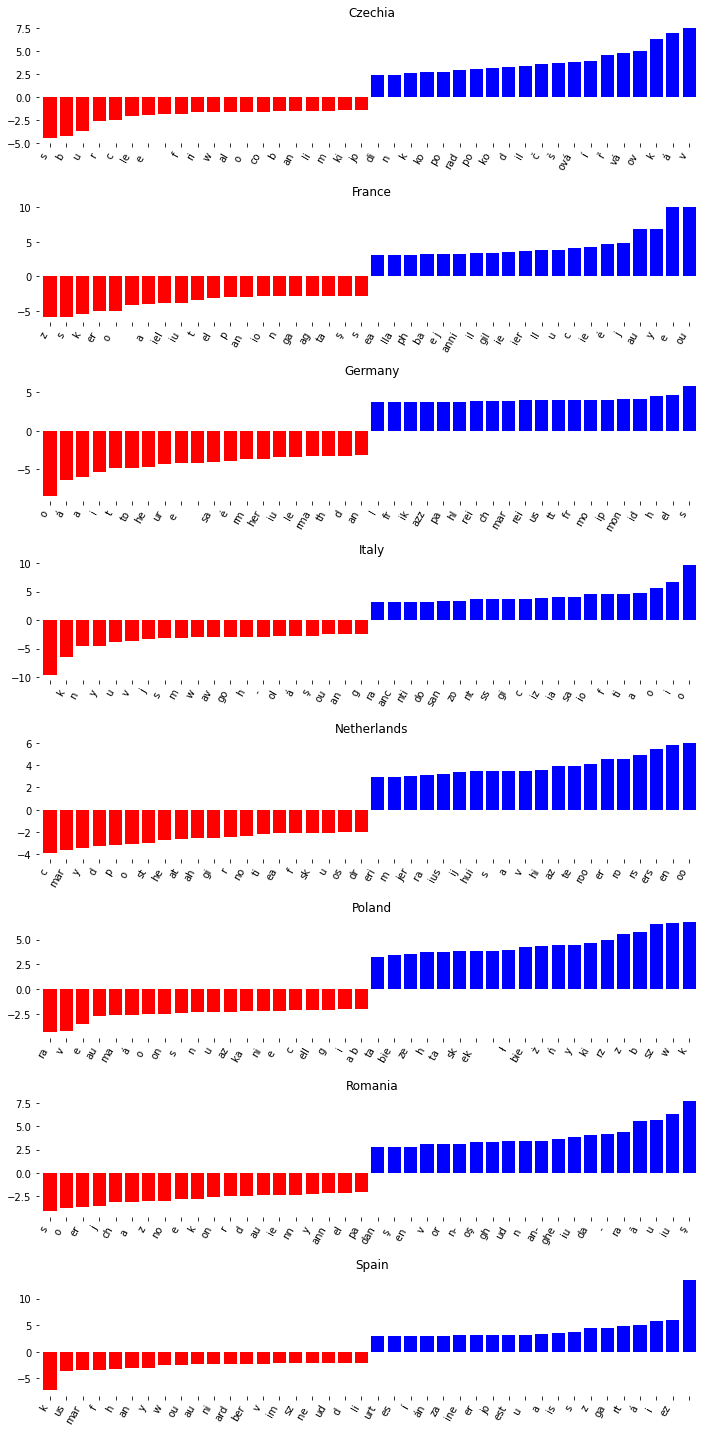

In [43]:
lr = grid.best_estimator_.named_steps['logisticregression']
feature_names = np.array(grid.best_estimator_.\
    named_steps['countvectorizer'].get_feature_names())
n_classes = len(lr.classes_)
fig, axes = plt.subplots(n_classes, figsize=(10, 20))
for ax, coef, label in zip(axes.ravel(), lr.coef_, lr.classes_):
    ax.set_title(label)
    plot_important_features(coef, \
feature_names, top_n=20, ax=ax)
    
plt.tight_layout()